Dataset shape: (7733, 25)


,year,state_Kedah,state_Kelantan,state_Melaka,state_Negeri Sembilan,state_Pahang,state_Perak,state_Perlis,state_Pulau Pinang,state_Sabah,...,state_W.P. Putrajaya,sex_female,sex_male,ethnicity_bumi_other,ethnicity_chinese,ethnicity_indian,ethnicity_other_citizen,ethnicity_other_noncitizen,ethnicity_overall,abs
0,2000.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1409.0
1,2001.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2430.0
2,2002.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2956.0
3,2003.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3150.0
4,2004.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2972.0


Training samples: 6186
Testing samples : 1547

✅ MLP Regressor model saved as 'mlp_birth_model.pkl'
✅ MLP model loaded successfully.

🧠 Loaded MLP Regressor Performance:
MAE : 1136.644
RMSE: 2242.145
R²  : 0.635


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



✅ Random Forest model loaded successfully.

🌳 Random Forest Regressor Performance:
MAE : 792.529
RMSE: 1905.485
R²  : 0.737

--- Final Model Comparison ---


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Model,MAE,RMSE,R²
0,Random Forest,792.529497,1905.484834,0.736508
1,MLP Regressor,1136.643548,2242.144546,0.635175


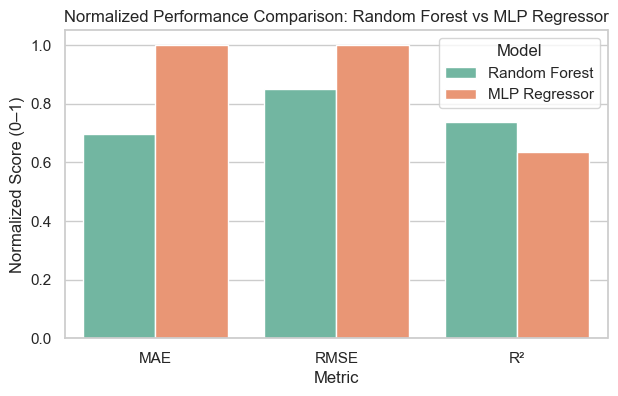


✅ The better performing model based on R² is: Random Forest


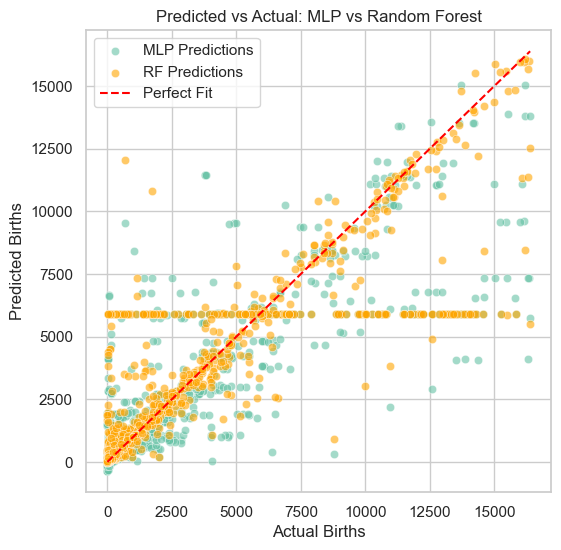

In [3]:
# ============================================================
# TASK 1 – MLP REGRESSOR (TRAIN, TEST, SAVE, LOAD, COMPARE)
# ============================================================

# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

sns.set(style="whitegrid", palette="Set2")

# ============================================================
# STEP 2: LOAD DATA
# ============================================================

df = pd.read_csv("final_birth_regression.csv")
print("Dataset shape:", df.shape)
display(df.head())

# ============================================================
# STEP 3: SPLIT FEATURES AND TARGET
# ============================================================

X = df.drop(columns=['abs'])
y = df['abs']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples : {X_test.shape[0]}")

# ============================================================
# STEP 4: SCALE FEATURES
# ============================================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================================
# STEP 5: TRAIN AND SAVE MLP REGRESSOR
# ============================================================

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=20
)

mlp.fit(X_train_scaled, y_train)

# Save the trained MLP model
joblib.dump(mlp, "mlp_birth_model.pkl")
print("\n✅ MLP Regressor model saved as 'mlp_birth_model.pkl'")

# ============================================================
# STEP 6: TEST THE SAVED MLP MODEL
# ============================================================

# Load the saved MLP model
mlp_loaded = joblib.load("mlp_birth_model.pkl")
print("✅ MLP model loaded successfully.")

# Make predictions
y_pred_mlp = mlp_loaded.predict(X_test_scaled)

# Evaluate performance
mlp_mae  = mean_absolute_error(y_test, y_pred_mlp)
mlp_rmse = mean_squared_error(y_test, y_pred_mlp, squared=False)
mlp_r2   = r2_score(y_test, y_pred_mlp)

print("\n🧠 Loaded MLP Regressor Performance:")
print(f"MAE : {mlp_mae:.3f}")
print(f"RMSE: {mlp_rmse:.3f}")
print(f"R²  : {mlp_r2:.3f}")

# ============================================================
# STEP 7: LOAD RANDOM FOREST MODEL FOR COMPARISON
# ============================================================

rf_loaded = joblib.load("random_forest_birth_model.pkl")
print("\n✅ Random Forest model loaded successfully.")

# Predict using Random Forest
y_pred_rf = rf_loaded.predict(X_test)

# Evaluate Random Forest performance
rf_mae  = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2   = r2_score(y_test, y_pred_rf)

print("\n🌳 Random Forest Regressor Performance:")
print(f"MAE : {rf_mae:.3f}")
print(f"RMSE: {rf_rmse:.3f}")
print(f"R²  : {rf_r2:.3f}")

# ============================================================
# STEP 8: FINAL COMPARISON (TABLE + FIXED VISUALIZATION)
# ============================================================

comparison_final = pd.DataFrame({
    'Model': ['Random Forest', 'MLP Regressor'],
    'MAE': [rf_mae, mlp_mae],
    'RMSE': [rf_rmse, mlp_rmse],
    'R²': [rf_r2, mlp_r2]
})

print("\n--- Final Model Comparison ---")
display(comparison_final)

# --- Create normalized scores for visualization ---
comparison_scaled = comparison_final.copy()
comparison_scaled[['MAE', 'RMSE']] = comparison_scaled[['MAE', 'RMSE']] / comparison_scaled[['MAE', 'RMSE']].max()
# keep R² as is (since 0–1 range)
comparison_scaled_melted = comparison_scaled.melt(id_vars='Model', var_name='Metric', value_name='Normalized Score')

# --- Plot normalized comparison ---
plt.figure(figsize=(7,4))
sns.barplot(
    data=comparison_scaled_melted,
    x='Metric', y='Normalized Score', hue='Model'
)
plt.title("Normalized Performance Comparison: Random Forest vs MLP Regressor")
plt.ylabel("Normalized Score (0–1)")
plt.show()

# Identify which model performed better
best_model = "Random Forest" if rf_r2 > mlp_r2 else "MLP Regressor"
print(f"\n✅ The better performing model based on R² is: {best_model}")

# ============================================================
# STEP 9: VISUALIZE PREDICTED VS ACTUAL
# ============================================================

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_mlp, alpha=0.6, label="MLP Predictions")
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, label="RF Predictions", color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit")
plt.title("Predicted vs Actual: MLP vs Random Forest")
plt.xlabel("Actual Births")
plt.ylabel("Predicted Births")
plt.legend()
plt.show()


In [8]:
# ============================================================
# STEP 10: ENSEMBLE MODEL (AVERAGE OF MLP + RANDOM FOREST)
# ============================================================

# Combine predictions by averaging them
y_pred_ensemble = (y_pred_mlp + y_pred_rf) / 2

# Evaluate ensemble performance
ensemble_mae  = mean_absolute_error(y_test, y_pred_ensemble)
ensemble_rmse = mean_squared_error(y_test, y_pred_ensemble, squared=False)
ensemble_r2   = r2_score(y_test, y_pred_ensemble)

print("\n🤝 Ensemble Model (Average of MLP & Random Forest) Performance:")
print(f"MAE : {ensemble_mae:.3f}")
print(f"RMSE: {ensemble_rmse:.3f}")
print(f"R²  : {ensemble_r2:.3f}")

# Compare all three models
comparison_all = pd.DataFrame({
    'Model': ['Random Forest', 'MLP Regressor', 'Ensemble (RF + MLP)'],
    'MAE': [rf_mae, mlp_mae, ensemble_mae],
    'RMSE': [rf_rmse, mlp_rmse, ensemble_rmse],
    'R²': [rf_r2, mlp_r2, ensemble_r2]
})

print("\n--- Extended Model Comparison ---")
display(comparison_all)




🤝 Ensemble Model (Average of MLP & Random Forest) Performance:
MAE : 936.702
RMSE: 1979.690
R²  : 0.716

--- Extended Model Comparison ---


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Model,MAE,RMSE,R²
0,Random Forest,791.604345,1906.280596,0.736288
1,MLP Regressor,1136.643548,2242.144546,0.635175
2,Ensemble (RF + MLP),936.701801,1979.690083,0.715586



✅ Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 752, in fit


✅ Best MLP Params: {'activation': 'relu', 'hidden_layer_sizes': (32, 16), 'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'adam'}

--- Final Model Comparison ---


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Model,MAE,RMSE,R²
0,Random Forest,792.529497,1905.484834,0.736508
1,MLP Regressor,1179.209928,2258.218643,0.629926


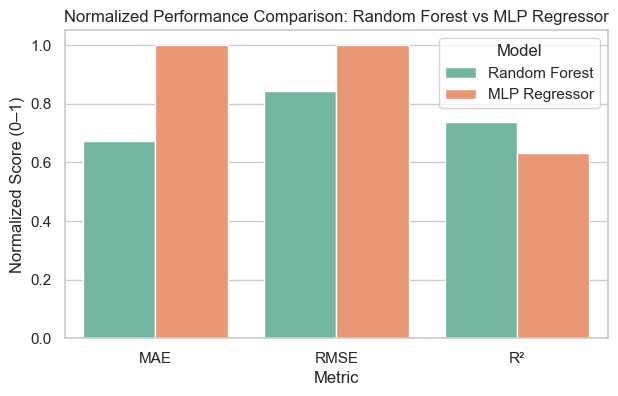


✅ The better performing model based on R² is: Random Forest


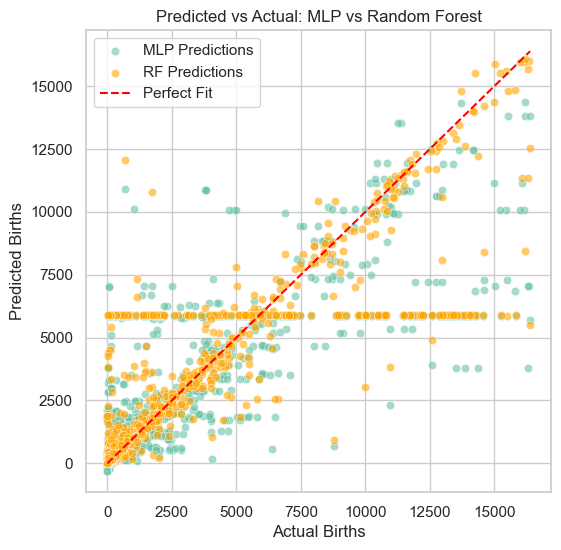

In [5]:
# ============================================================
# TASK 1 – MLP & RF REGRESSOR (TUNE, TRAIN, TEST, SAVE, LOAD, COMPARE)
# ============================================================

# --- Step 1–6 remain the same: import, load data, split, scale --- #

# ============================================================
# STEP 5: HYPERPARAMETER TUNING & TRAIN MODELS
# ============================================================

from sklearn.model_selection import GridSearchCV

# --------- Random Forest Tuning ---------
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print("\n✅ Best Random Forest Params:", rf_grid.best_params_)

# Save the tuned RF model
joblib.dump(best_rf, "random_forest_birth_model.pkl")

# --------- MLP Regressor Tuning ---------
mlp_params = {
    'hidden_layer_sizes': [(64,32,16), (128,64,32), (32,16)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500, 1000]
}

mlp_grid = GridSearchCV(
    estimator=MLPRegressor(random_state=42, early_stopping=True, n_iter_no_change=20),
    param_grid=mlp_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

mlp_grid.fit(X_train_scaled, y_train)
best_mlp = mlp_grid.best_estimator_
print("\n✅ Best MLP Params:", mlp_grid.best_params_)

# Save the tuned MLP model
joblib.dump(best_mlp, "mlp_birth_model.pkl")

# ============================================================
# STEP 6: LOAD MODELS AND MAKE PREDICTIONS
# ============================================================

# Load tuned models
mlp_loaded = joblib.load("mlp_birth_model.pkl")
rf_loaded  = joblib.load("random_forest_birth_model.pkl")

# Predict
y_pred_mlp = mlp_loaded.predict(X_test_scaled)
y_pred_rf  = rf_loaded.predict(X_test)

# Evaluate
mlp_mae  = mean_absolute_error(y_test, y_pred_mlp)
mlp_rmse = mean_squared_error(y_test, y_pred_mlp, squared=False)
mlp_r2   = r2_score(y_test, y_pred_mlp)

rf_mae  = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2   = r2_score(y_test, y_pred_rf)

# ============================================================
# STEP 7–9: FINAL COMPARISON & VISUALIZATION (same as your code)
# ============================================================

comparison_final = pd.DataFrame({
    'Model': ['Random Forest', 'MLP Regressor'],
    'MAE': [rf_mae, mlp_mae],
    'RMSE': [rf_rmse, mlp_rmse],
    'R²': [rf_r2, mlp_r2]
})

print("\n--- Final Model Comparison ---")
display(comparison_final)

# Normalized scores
comparison_scaled = comparison_final.copy()
comparison_scaled[['MAE', 'RMSE']] = comparison_scaled[['MAE', 'RMSE']] / comparison_scaled[['MAE', 'RMSE']].max()
comparison_scaled_melted = comparison_scaled.melt(id_vars='Model', var_name='Metric', value_name='Normalized Score')

plt.figure(figsize=(7,4))
sns.barplot(data=comparison_scaled_melted, x='Metric', y='Normalized Score', hue='Model')
plt.title("Normalized Performance Comparison: Random Forest vs MLP Regressor")
plt.ylabel("Normalized Score (0–1)")
plt.show()

best_model = "Random Forest" if rf_r2 > mlp_r2 else "MLP Regressor"
print(f"\n✅ The better performing model based on R² is: {best_model}")

# Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_mlp, alpha=0.6, label="MLP Predictions")
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, label="RF Predictions", color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit")
plt.title("Predicted vs Actual: MLP vs Random Forest")
plt.xlabel("Actual Births")
plt.ylabel("Predicted Births")
plt.legend()
plt.show()
